# HW1.0.0 

## Define big data. Provide an example of a big data problem in your domain of expertise. 

<font color='green'> **Put simply, Big Data is data that won't fit in memory. For example, if I wanted to do an analysis on all transactions at all Target stores for the last two years, that data would not fit into memory.** </font>

## What is a race condition in the context of parallel computation? Give an example.

<font color='green'> **A race condition occurs when you are processing data across multiple clusters/cores and you are not accounting for the fact that the processing of that data can occur in any order across those clusters/cores. ** </font>

## What is MapReduce?

<font color='green'> **MapReduce is used as a way of processing data in parallel, allowing for processing of large sets of data that would not fit into memory. It is used for processing data across multiple computers/nodes/clusters. It is broken into two or more tasks, and at it's most basic consists of a map and a reduce (ideally has a combiner!). ** </font>

## How does it differ from Hadoop?

<font color='green'> **Hadoop is a distributed file system. In other words, it allows for the processing of data across a distributed system, allowing for the analysis of data that would not fit into the memory of a single machine. MapReduce is a type of functional programming that can be run on Hadoop (Hadoop is an implementation of MapReduce). MapReduce requires a distributed system such as Hadoop to allow for the processing of big data.** </font>

## HW1.0.1: 

### Here is an example of functional programming in basic python in terms of mappers and reducers (by way of example):


### #EXAMPLE Mapper functions in Python:
```python
def fahrenheit(T):
    return ((float(9)/5)*T + 32)

def celsius(T):
    return (float(5)/9)*(T-32)
 
temperatures = (36.5, 37, 37.5, 38, 39)
F = map(fahrenheit, temperatures)
#returns  97.7  98.6  99.5 100.4 102.2
C = map(celsius, F)

#EXAMPLE Reducer function in Python
import functools
functools.reduce(lambda x,y: x+y, [47,11,42,13])
#returns 113

import functools as reduce
print "Average temp is %fF" % (reduce(lambda x,y: x+y, F)/len(F) )
#returns Average temp is 99.68F
```

### Which programming paradigm is Hadoop based on? Explain and give a simple example of functional programming in raw python code and show the code running. E.g., in raw python find the average length of a string in and of strings using a python "map-reduce" (functional programming) job (similar in style to the above). Alternatively, you can do this in python Hadoop Streaming.   

```python
strings = ["str1", "string2", "w261", "MAchine learning at SCALE"]
.......
 
import functools as reduce
temperatures = (36.5, 37, 37.5, 38, 39)
F = map(fahrenheit, temperatures)
print "Average temp is %fF" % (reduce(lambda x,y: x+y, F)/len(F) )
#returns Average temp is 99.68F

map(sqr, items)
```


<font color='green'> **Hadoop is based on the MapReduce programming paradigm which is inspired from the map and reduce functions typically used in functional programing (see example below)** </font>

In [1]:
# MapReduce example - avg length of strings
import functools

def length_string(S):
    return(len(S))

strings = ["str1", "string2", "w261", "MAchine learning at SCALE"]

A = map(length_string, strings)

print('Average (Mean) Length for the input strings is %i' % (functools.reduce(lambda x, y: x + y, A) / len(A)))

# print('Average (Mean) Length for the input strings is {:f}'.format(functools.reduce(lambda x, y: x + y, A) / len(A)))

Average (Mean) Length for the input strings is 10


# HW1.1 Cross fold validation (*)

What is cross validation (in partiticular 10-fold cross validation)?


* for more background see slides from lecture 2:
   * https://www.dropbox.com/s/3ch0yb4oxyxsuo9/Lecture-02-ML-Intro-Bias-Variance.pdf?dl=0

and 

   * https://en.wikipedia.org/wiki/Cross-validation_(statistics)

<font color='green'> **Cross validation involves developing and testing a model on independent sets of data where the outcome is known. For example, with the Enron data we have split the data up into training, testing, and validation data. We build the model on the training data and then test our model on the testing data (where classifier/outcome is known) to see how accurate our different models are. After picking the best model, we then see how it performs on the validation data to ensure that our model is performing as expected. In 10-fold cross validation, our data would be randomly partitioned into 10 equal sized subsamples, one if which is retained for validation and the rest are used for training. This cross validation process is then repeated on the other subsamples, with each of the subsamples used once as the validation data. The results are then averaged into a single estimation.** </font>

# Info for the rest of the assignment: 

===== SPAM Dataset 
In the remainder of this assignment you will produce a spam filter
that is backed by a multinomial naive Bayes classifier  (see http://nlp.stanford.edu/IR-book/html/htmledition/properties-of-naive-bayes-1.html).

For the sake of this assignment we will focus on the basic construction 
of the parallelized classifier, and not consider its validation or calibration,
and so you will have the classifier operate on its own training data (unlike a 
field application where one would use non-overlapping subsets for training, validation and testing).

The data you will use is a curated subset of the Enron email corpus
(whose details you may find in the file enronemail_README.txt  in the directory surrounding these instructions).

NOTE: please use the subject field and the body field for all your Naive Bayes modeling. 

NOTE: This SPAM/HAM dataset for HW1 contains 100 records from the Enron SPAM/HAM corpus. Please limit your study to this unless otherwise instructed. There are about 93,000 emails in the original SPAM/HAM corpus. There are several versions of the SPAM/HAM corpus. Other Enron-Spam datasets are available from http://www.aueb.gr/users/ion/data/enron-spam/index.html and http://www.aueb.gr/users/ion/publications.html in both raw and pre-processed form. 

Doing some exploratory data analysis you will see (with this very small dataset) the following:
> wc -l enronemail_1h.txt  #100 email records
     100 enronemail_1h.txt
> cut -f2 -d$'\t' enronemail_1h.txt|wc  #extract second field which is SPAM flag
     101     394    3999
JAMES-SHANAHANs-Desktop-Pro-2:HW1-Questions jshanahan$ cut -f2 -d$'\t' enronemail_1h.txt|head
0
0
0
0
0
0
0
0
1
1

> head -n 100 enronemail_1h.txt|tail -1|less #an example SPAM email record
018.2001-07-13.SA_and_HP       1        [ilug] we need your assistance to invest in your country        dear sir/madam,  i am well confident of your capability to assist me in  a transaction for mutual benefit of both parties, ie  (me and you) i am also believing that you will not  expose or betray the trust and confidence i am about  to establish with you. i have decided to contact you  with greatest delight and personal respect.  well, i am victor sankoh, son to mr. foday  sankoh  who was arrested by the ecomog peace keeping force  months ago in my country sierra leone. ….

# HW1.2:  WORDCOUNT

Using the Enron dataset and Hadoop MapReduce streaming (or MRJob), write the mapper/reducer job that  will determine the word count (number of occurrences) of each white-space delimitted token (assume spaces, fullstops, comma as delimiters). Examine the word “assistance” and report its word count results.

 
CROSSCHECK: >grep assistance enronemail_1h.txt|cut -d$'\t' -f4| grep assistance|wc -l    
       8    
       #NOTE  "assistance" occurs on 8 lines but how many times does the token occur? 10 times! This is the number we are looking for!


In [2]:
%%writefile wordcount.py   
# Note that this code works even when reducer is not set to 1
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

from mrjob.job import MRJob
import re, string

class MRJobWordCount(MRJob):

    def mapper(self, _, line):
        # Creates regular expression to modify punctuation characters so that they will not mess up regex
        regex = re.compile('[%s]' % re.escape(string.punctuation))
        # Splits the lines by the first 2 tabs. Keeps everything after the second tab. 
        token = line.strip().split('\t', 2)[-1]
        # Uses the regex above to replace puctuation with a ' ' and puts all words in lower case
        token = regex.sub(' ', token.lower())
        # Converts all white space that is not a ' ' into a ' ', including duplicate spaces
        token = re.sub( '\s+', ' ', token )
        
        # Creates a list of the words
        words = token.split()

        # for loop that results in only words greater than length 1 being yielded
        for word in words:
            if len(word) > 1:
                yield (word, 1)
   
    # Creats sum by word for each mapper - like a per-mapper reducer
    def combiner(self, word, counts):
        yield (word, sum(counts))

    # Creates an empty dictionary called results, then sums 
    def reducer(self, word, counts):
        yield (word, sum(counts))
    
if __name__ == '__main__':
    MRJobWordCount.run()

Writing wordcount.py


In [3]:
!python wordcount.py enronemail_1h.txt

No configs found; falling back on auto-configuration
Creating temp directory /var/folders/mq/yly0yqf16wggskk8bwchkhjmkztgr3/T/wordcount.z001gyq.20160628.150110.788633
Running step 1 of 1...
Streaming final output from /var/folders/mq/yly0yqf16wggskk8bwchkhjmkztgr3/T/wordcount.z001gyq.20160628.150110.788633/output...
"00"	33
"000"	52
"001"	3
"0011"	1
"00450"	1
"0080"	1
"01"	25
"012"	4
"02"	19
"028"	1
"0281"	1
"03"	3
"036474336"	1
"04"	7
"048"	1
"05"	4
"055"	2
"06"	21
"0643"	1
"07"	10
"08"	22
"081"	2
"088889774"	1
"09"	21
"10"	44
"100"	19
"100038"	1
"1016"	1
"103"	1
"107"	1
"108"	1
"11"	15
"114427"	1
"12"	74
"120"	1
"1200"	2
"122"	1
"123"	3
"123395"	1
"124"	3
"125"	2
"126"	2
"13"	13
"134"	1
"14"	33
"146907159"	1
"148415904"	1
"1488230796"	1
"149"	1
"15"	25
"150"	1
"1500"	1
"151"	1
"1517"	1
"16"	5
"161"	1
"1687"	1
"1689"	1
"17"	19
"18"	18
"1814"	1
"1848"	1
"1864"	1
"19"	9
"1928"	1
"1930"	1
"1932"	1
"1933"	1
"1934"	1
"1935"	1
"1936"	1
"1938"	1
"1941"	1
"1942"	1
"1944"	1
"1945"	1
"1947"	1
"

In [4]:
# Check the number of times assistance appears 
!grep -o assistance enronemail_1h.txt | wc -l

      10


In [5]:
# Output word counts to txt for later use

%reload_ext autoreload
%autoreload 2

from numpy import random
from wordcount import MRJobWordCount 
     
count_data = 'enronemail_1h.txt'

mr_job = MRJobWordCount(args=[count_data])
model_stats = {}
with mr_job.make_runner() as runner: 
    runner.run()
    # stream_output: get access to the output reducer/reducer_final of 
    # the last step in MRJobWordCount
    for line in runner.stream_output():
        key, value =  mr_job.parse_output_line(line)
        print key, value
        model_stats[key] = value            
    # Store model locally
    with open('model1.txt', 'w') as f:
        for k in model_stats.keys():
            f.writelines( k + "\t"+ str(model_stats[k]) +"\n")
print model_stats

00 33
000 52
001 3
0011 1
00450 1
0080 1
01 25
012 4
02 19
028 1
0281 1
03 3
036474336 1
04 7
048 1
05 4
055 2
06 21
0643 1
07 10
08 22
081 2
088889774 1
09 21
10 44
100 19
100038 1
1016 1
103 1
107 1
108 1
11 15
114427 1
12 74
120 1
1200 2
122 1
123 3
123395 1
124 3
125 2
126 2
13 13
134 1
14 33
146907159 1
148415904 1
1488230796 1
149 1
15 25
150 1
1500 1
151 1
1517 1
16 5
161 1
1687 1
1689 1
17 19
18 18
1814 1
1848 1
1864 1
19 9
1928 1
1930 1
1932 1
1933 1
1934 1
1935 1
1936 1
1938 1
1941 1
1942 1
1944 1
1945 1
1947 1
1949 1
1953 1
1980 2
1990 2
1992 3
1997 3
1998 2
1999 10
20 20
200 3
2000 30
2001 29
2002 2
2003 19
2004 16
2005 3
201 2
2020 1
2086 1
209318 1
21 3
211075433222 2
212 3
213 1
2152 1
22 8
224 1
229 2
23 4
230 1
234 1
24 27
249 2
2497 1
25 4
250 1
2500 1
252050406 1
255326837 1
256 1
25711 2
2575 4
259 1
26 5
260 2
263 2
2666 1
27 6
27049 2
2753 1
28 10
2807 1
281 1
2868 1
29 10
29155 1
2963 1
299 1
30 20
300 9
3000 2
3011 1
306 2
31 4
312 1
3130 1
31615304791 1
32 12
3

In [6]:
model_stats = {}
records = [s.split('\n')[0].split('\t') for s in open("model1.txt").readlines()]
for word, count in records:
    model_stats[word] =  map(int, count.split(","))
model_stats

{'limited': [14],
 'entergyr': [1],
 'paul': [2],
 '1200': [2],
 'doubts': [1],
 'dynamic': [2],
 'knelt': [1],
 'yellow': [1],
 'barraged': [1],
 'prefix': [1],
 '35782': [1],
 'invovled': [2],
 'railing': [1],
 'appetite': [2],
 'hate': [4],
 'worked': [3],
 'consider': [4],
 'increase': [12],
 'fronts': [1],
 'hillis': [1],
 'chinese': [1],
 'granting': [1],
 'electricity': [1],
 '7517': [1],
 '345': [1],
 'bailout': [8],
 'koromah': [2],
 'swap': [2],
 'whatsoever': [3],
 'tenacity': [1],
 'pamela': [2],
 'sorry': [2],
 'diverted': [1],
 'homemakers': [1],
 '349': [2],
 'overpaying': [1],
 'carried': [1],
 'merchant': [5],
 '964': [2],
 'updated': [1],
 'collaborate': [3],
 'legislators': [2],
 'risk': [49],
 'taylorja': [1],
 '965': [1],
 'regional': [11],
 'distort': [1],
 'systemslogical': [1],
 '001': [3],
 'crenshaw': [13],
 'every': [14],
 'kick': [1],
 'ceos': [1],
 'affect': [2],
 'screaming': [1],
 'managerial': [2],
 'huse': [1],
 'four': [8],
 'school': [2],
 'internally

## HW1.2.1  

Using Hadoop MapReduce (or MRJob) and your wordcount job (from HW1.2) determine the top-10 occurring tokens (most frequent tokens) using a single reducer. 

In [7]:
from collections import Counter

# Using model_stats created in MRJob above to get 10 most common words
Counter(model_stats).most_common(10)

[('the', [1247]),
 ('to', [964]),
 ('and', [670]),
 ('of', [566]),
 ('you', [445]),
 ('in', [418]),
 ('your', [395]),
 ('ect', [382]),
 ('for', [374]),
 ('on', [271])]

# HW1.3: Multinomial NAIVE BAYES with NO Smoothing using a single reducer

Using the Enron data from HW1 and Hadoop MapReduce (or MRJob), write  a mapper/reducer job(s) that
   will both learn  Naive Bayes classifier and classify the Enron email messages using the learnt Naive Bayes classifier. Use all white-space delimitted tokens as independent input variables (assume spaces, fullstops, commas as delimiters). Note: for multinomial Naive Bayes, the Pr(X=“assistance”|Y=SPAM) is calculated as follows:

   the number of times “assistance” occurs in SPAM labeled documents / the number of words in documents labeled SPAM 

   E.g.,   “assistance” occurs 5 times in all of the documents Labeled SPAM, and the length in terms of the number of words in all documents labeled as SPAM (when concatenated) is 1,000. Then Pr(X=“assistance”|Y=SPAM) = 5/1000. Note this is a multinomial estimation of the class conditional for a Naive Bayes Classifier. No smoothing is needed in this HW. Multiplying lots of probabilities, which are between 0 and 1, can result in floating-point underflow. Since log(xy) = log(x) + log(y), it is better to perform all computations by summing logs of probabilities rather than multiplying probabilities. Please pay attention to probabilites that are zero! They will need special attention. 


***Count up how many times you need to process a zero probabilty for each class and report. 

***Report the performance of your learnt classifier in terms of misclassifcation error rate of your multinomial Naive Bayes Classifier. 

***Plot a histogram of the posterior probabilities (i.e., Pr(Class|Doc)) for each class over the training set. Summarize what you see. 

   Error Rate = misclassification rate with respect to a provided set (say training set in this case). It is more formally defined here:

Let DF represent the evalution set in the following:
Err(Model, DF) = |{(X, c(X)) ∈ DF : c(X) != Model(x)}|   / |DF|

Where || denotes set cardinality; c(X) denotes the class of the tuple X in DF; and Model(X) denotes the class inferred by the Model “Model”

NOTE: please assume one reducer.


<font color='green'> **FEEDBACK: I just wanted to provide a little feedback that it was really hard to 
    catch everything you wanted for these assignments given that they were in large blocks of text. For example, 
    I didn't see until this morning (the day the assignment is due) the two parts that I have added an "*" to. I have     a feeling myself, as well as other students, will have accidentally missed parts of the assignments as a result.       In the future, can we get a numbered list that includes everything you would like?** </font>

In [49]:
# Frist splitting data into 70% for training, 15% for valdiation, and 15% for testing 
# Works even if number of lines != 100
import random

with open("enronemail_1h.txt", "r") as f:
    data = f.read().split('\n')

# Randomly sort data to avoid any bias from the order in original data
random.shuffle(data)

num_lines = len(data)
num_lines_70pct = int(.7*num_lines)
num_lines_85pct = int(.85*num_lines)


train_data = data[:num_lines_70pct]
validation_data = data[num_lines_70pct:num_lines_85pct]
testing_data = data[num_lines_85pct:]

with open("enron_training_data.txt", "w") as f:
    f.write("\n".join(train_data))
with open("enron_validation_data.txt", "w") as f:
    f.write("\n".join(validation_data))
with open("enron_testing_data.txt", "w") as f:
    f.write("\n".join(testing_data))

In [50]:
%%writefile naive_bayes_enron.py

# NOTE: I could set this to use one reducer as was asked, but there is no need to with the code below. 

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals
 
from collections import defaultdict
 
from mrjob.job import MRJob
from mrjob.job import MRStep

import re, string

# Stores the number of emails by classifier
email_counts = dict()
 
# Stores the number of words by classifier
word_counts = dict()

class NaiveBayesEnron(MRJob):
    """
    A MRJob class for a Naive Bayes probability domain calculation of whether an email
    is SPAM or HAM (not-spam).
    """
 
    def __init__(self, *args, **kwargs):
        super(NaiveBayesEnron, self).__init__(*args, **kwargs)
     
    def configure_options(self):
        """
        Adding this allows switching between smoothing methods w/o having to copy all code 
        for each method and for changing the min length of words included in the model
        """
        super(NaiveBayesEnron, self).configure_options()
        self.add_passthrough_option(
            '--smoothing', default='none', choices=['none', 'laplace', 'jm'], 
            help='Specifies the type of smoothing to use'
        )
    
        self.add_passthrough_option(
            '--min-word-frequency', default=1, dest='min_word_frequency', type='int',
            help='Specifies the min length of a word to be included in model'
        )
        
        self.add_passthrough_option(
            '--lambda', default=0.3, dest='jm_lambda', type='float',
            help='Specifies the desired lambda value for JM smoothing'
        )
        
    def steps(self):
        out = [
            MRStep(
                mapper = self.mapper_one,
                combiner = self.combiner_one,
                reducer = self.reducer_one
            )
        ]
        
        if self.options.smoothing == 'laplace': 
            out.append(MRStep(
                reducer = self.reducer_laplace
            ))
        
        elif self.options.smoothing == 'jm':
            out.append(MRStep(
                reducer = self.reducer_jm
            ))
            
        else:
            out.append(MRStep(
                reducer = self.reducer_unsmoothed
            ))
        
        return out
 
    def mapper_one(self, _, email):
        """
        Read each email and map it to a collection of words and
        counts
 
        :param _:
            There is no key here because we're loading raw text
        :param email:
            An email to be processed
        :return:
            Yields a generator that returns (key, value) tuples for each unique
            word present in the email.
                * key: a tuple containing the word and the classifier for
                    the email
                * value: the number of times that word appeared in the email
        """
        regex = re.compile('[%s]' % re.escape(string.punctuation))
        _, classifier, token = email.strip().split('\t', 2)
        token = regex.sub(' ', token.lower())
        token = re.sub( '\s+', ' ', token )
        
        words = token.split()
 
        # Counter for the number of emails processed by classifier
        yield (('EMAILS', classifier), 1)
 
        for word in set(words):                
            count = words.count(word)
 
            yield ((word, classifier), count)
 
            # Counter for the number of words processed by classifier
            yield (('WORDS', classifier), count)
 
 
    def combiner_one(self, word_classifier, counts):
        """
        Combine the raw output of each mapper so that the value for each key
        is now the number of times each word-classifier appeared in that
        mapper (not just in a particular email). This reduces the amount of
        data each mapper sends to the reducer.
 
        :param word_classifier:
            A tuple with a word and classifier combination
        :param counts:
            The number of counts that word + classifier combination was found
            in each email processed by a particular mapper.
        :return:
            Yields a generator that returns (key, value) tuples for each unique
            word processed by a particular mapper.
                * key: a tuple containing the word and the classifier for
                    the email
                * value: the number of times that word + classifier
                    combination appeared in the mapper
        """
 
        yield (word_classifier, sum(counts))
 
    def reducer_one(self, word_classifier, counts):
        """
        Collects the results of each mapper to get the total counts for each
        word + classifier combination within the processed document.
 
        :param word_classifier:
            A tuple with a word and classifier combination
        :param counts:
            The number of counts that word + classifier combination was found
            in each email processed by a particular mapper.
        :return:
            Yields a generator that returns (key, value) tuples for each unique
            word processed by a particular mapper.
                * key: a tuple containing the word and the classifier for
                    the email
                * value: the number of times that word + classifier
                    combination appeared in the mapper
        """
        # Calculate the count for each key 
        # e.g., for key (word, classifier) sum the list coming in from the combiner/mapper 
        # Could look like this: (the, 0):[1,4,1] will turn into (the, 0):6
        total_count = sum(counts)
        # split up the word_classifier tuple into word, classifier
        word, classifier = word_classifier
 
        # store the total number of words for a paticular classifier
        # By time the reducer is done, this will add the word count for each classifier to the word_counts dict
        # adding the return at the end of this it discards the "WORDS" keys 
        # as they are no longer needed after getting total_count
        if word == 'WORDS':
            if classifier not in word_counts:
                word_counts[classifier] = 0
                
            word_counts[classifier] += total_count
            return
        
        # store the total number of emails for a paticular classifier
        # By time the reducer is done, this will add the number of emails for each classifier to the email_counts dict 
        # Changed word from 'EMAILS' to 'PRIOR' because how we calculate priors is with the total num emails per classifier
        if word == 'EMAILS':
            email_counts[classifier] = total_count
            word = 'PRIOR'
 
        # This will be reduced again as we may get outputs for the same key more than once (if word appeared in both classifiers)
        # for example, (the, {0:3}) and (the, {1:5})
        # What the next reducer will receive in this case will look like this: (the, [{0:3}, {1:5}])
        if total_count < self.options.min_word_frequency:
            # Removes words from the total count if they were below the threshold and doesn't yield them to the
            # second stage reducers
            if classifier not in word_counts:
                word_counts[classifier] = 0
            word_counts[classifier] -= total_count
        else:
            yield (word, {classifier: total_count})
 
    def reducer_unsmoothed(self, word, classified_counts):
        """
        After the first reducer has completed, which populates the global
        variables needed to calculate probabilities from word counts, the
        results stream is processed to return the smoothed probabilities
 
        :param word:
            A unique word that was processed within the document
        :param classified_counts:
            A collection of dictionaries where the keys in each dictionary
            are the classifiers and the values are the number of times that
            word appeared within that classifier.
        :return:
            Prints the final Naive Bayes probabilities for later use
        """
 
        # dictionary where if the key doesn't exist, just give me 0
        combined = defaultdict(lambda: 0)
    
        # Creatse a single dictionary for a given word, with the key = classifier, and value = count
        # Using the example above this will result in {0:3, 1:5}
        for entry in classified_counts:
            for classifier, count in entry.items():
                combined[classifier] += count
 
        # for each classifier calculate the probability that the given word occured
        # if the word is 'PRIOR' it calculates the prior probability for that classifier
        for classifier in email_counts.keys():
            count = combined.get(classifier, 0)
 
            if word == 'PRIOR':
                probability = count / sum(email_counts.values())
            else:
                probability = count / word_counts[classifier]
 
            yield (word, classifier), probability
    
    def reducer_laplace(self, word, classified_counts):
        """
        This is the laplace smoothed version of the second stage reducer (reducer_unsmoothed)
        """
        
        combined = defaultdict(lambda: 0)
        
        for entry in classified_counts:
            for classifier, count in entry.items():
                combined[classifier] += count
 
        for classifier in email_counts.keys():
            count = combined.get(classifier, 0)
 
            if word == 'PRIOR':
                probability = count / sum(email_counts.values())
            else:
                probability = (count + 1) / (word_counts[classifier] + 2)
 
            yield (word, classifier), probability
    
    def reducer_jm(self, word, classified_counts):
        """
        This is the Jelinek-Mercer smoothed version of the second stage reducer (reducer_unsmoothed)
        """
        
        combined = defaultdict(lambda: 0)
        
        for entry in classified_counts:
            for classifier, count in entry.items():
                combined[classifier] += count
 
        for classifier in email_counts.keys():
            count = combined.get(classifier, 0)

        for classifier in email_counts.keys():
            count = combined.get(classifier, 0)
            jm_lambda = self.options.jm_lambda
        
            if word == 'PRIOR':
                probability = count / sum(email_counts.values())
            else:
                total_this_word = sum(combined.values())
                total_all_words = sum(word_counts.values())
                
                probability = (
                    (1 - jm_lambda) * (count / word_counts[classifier]) +
                    (jm_lambda * total_this_word / total_all_words)
                )
                
            yield (word, classifier), probability 

if __name__ == '__main__':
    NaiveBayesEnron.run()

Overwriting naive_bayes_enron.py


In [51]:
# Build model code
%reload_ext autoreload
%autoreload 2

import naive_bayes_enron as nbe 


def build_model(training_filename, output_filename, smoothing_type='none', min_word_frequency=1, jm_lambda=0.3):
    nbe.word_counts = dict()
    nbe.email_counts = dict()
    mr_job = nbe.NaiveBayesEnron(
        args=[
            training_filename,
            '--smoothing={}'.format(smoothing_type),
            '--min-word-frequency={}'.format(min_word_frequency),
            '--lambda={}'.format(jm_lambda)
        ]
    )
    model_stats = dict()
    
    with mr_job.make_runner() as runner: 
        runner.run()
        # stream_output: get access to the output reducer/reducer_final of 
        # the last step in NaiveBayesEnron
        for line in runner.stream_output():
            key, value =  mr_job.parse_output_line(line)
            word = key[0]
            classifier = int(key[1])

            if word not in model_stats:
                probabilities = ['0', '0']
                probabilities[classifier] = str(value)
                model_stats[word] = probabilities                        
            else:
                model_stats[word][classifier] = str(value)

        # Store model locally
        with open(output_filename, 'w') as f:
            for word, probabilities in model_stats.items():
                f.writelines(word + "\t" + "\t".join(probabilities) + "\n")

In [52]:
# build unsmoothed model    
build_model(    
    training_filename='enron_training_data.txt',
    smoothing_type='none',
    output_filename='enron_model_unsmoothed.txt',
    min_word_frequency=1
)

In [53]:
%%writefile naive_bayes_enron_classifier.py
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals
from mrjob.job import MRJob
from mrjob.step import MRStep
import os, re, string, math

counts = []
email_posteriors = dict()

class NaiveBayesEnronClassifier(MRJob):


    def __init__(self, *args, **kwargs):
        super(NaiveBayesEnronClassifier, self).__init__(*args, **kwargs)
        
    def steps(self):
        return [
            MRStep(
                mapper_init=self.mapper_init, 
                mapper=self.mapper,
                combiner=self.combiner,
                reducer=self.reducer  
            ),
            MRStep(
                reducer=self.reducer_two
            )
        ]

    def configure_options(self):
        super(NaiveBayesEnronClassifier, self).configure_options()
        
        self.add_file_option('--model')
        
    def mapper_init(self): 
        self.model_stats = {}

        with open(self.options.model, "r") as f:
            lines = f.read().split('\n')
        
        split_lines = [line.split('\t') for line in lines]
        del lines # Deleting the the line variable to save memory
        
        for entry in split_lines:
            word = entry[0]
            probabilities = [float(p) for p in entry[1:]]
            self.model_stats[word] = probabilities
    
    def mapper(self, _, line):
        regex = re.compile('[%s]' % re.escape(string.punctuation))
        _, classifier, token = line.strip().split('\t', 2)
        token = regex.sub(' ', token.lower())
        token = re.sub( '\s+', ' ', token )
        
        # set initial values to the priors obtainined in model_stats
        posteriors = [math.log10(prior) for prior in self.model_stats['PRIOR']]
        
        for word in token.split():
            # Get the value for the word, or if it is not in model_stats, return 0 as the default
            probabilities = self.model_stats.get(word, [0, 0]) 
            
            # converts all 0s to 1s - note that log10 of 1 = 0
            probabilities = [p if p > 0 else 1 for p in probabilities] 
           
            for index, probability in enumerate(probabilities):
                if probability == 1:
                    yield('zero_count_{}'.format(index), 1)
        
            posteriors = [x + math.log10(y) for x, y in zip(posteriors, probabilities)]
            
        for index, posterior in enumerate(posteriors):
            yield('post_{}'.format(index), posterior)
            
        # Determine which class the email belongs to (SPAM vs HAM)
        # If p_class_0 = p_class_1, class is unknown
        max_posterior = max(posteriors)
        max_counts = [1 if p == max_posterior else 0 for p in posteriors]
        if sum(max_counts) > 1:
            predicted_class = -1
        else:
            predicted_class = posteriors.index(max_posterior)
            
        # Determine if our predicted class is correct
        if predicted_class == int(classifier):
            key = 'correct'
        else:
            key = 'incorrect'
            
        yield (key, 1)
        yield ('email_count', 1)

    def combiner(self, key, values):
        
        if key.startswith('post_'):
            # Keep a list of the posteriors for each class type for histogram
            key = key.split('_')[-1]
            if key not in email_posteriors:
                email_posteriors[key] = []
            email_posteriors[key] += list(values)
            return
        
        yield (key, sum(values))
        
    def reducer(self, key, values):
        
        if key.startswith('post_'):
            # Keep a list of the posteriors for each class type for histogram
            key = key.split('_')[-1]
            if key not in email_posteriors:
                email_posteriors[key] = []
            email_posteriors[key] += list(values)
            return
        
        count = sum(values)
        
        if key in ['correct', 'incorrect']:
            counts.append(count)
            
        yield (key, count)
      
    def reducer_two(self, key, values):
        values = list(values)
        
        if key in ['correct', 'incorrect']:
            rate = sum(values) / sum(counts)
            out_key = 'error_rate' if key == 'incorrect' else 'accuracy'
            yield (out_key, rate)
        else:
            yield (key, sum(values))

if __name__ == '__main__':
    NaiveBayesEnronClassifier.run()

Overwriting naive_bayes_enron_classifier.py


In [54]:
%reload_ext autoreload
%autoreload 2

import os
import naive_bayes_enron_classifier as nbec


def run_classifier(trial_name, testing_filename, model_filename):
    model_path = os.path.join(
        os.path.abspath(os.path.curdir), 
        model_filename
    )
    nbec.counts = []
    nbec.email_posteriors = dict()
    mr_job = nbec.NaiveBayesEnronClassifier(
        args=[
            testing_filename,
            '--model={}'.format(model_path)
        ]
    )
    out = {'trial_name': trial_name, 'error_rate': 0, 'accuracy': 0, 'posteriors': nbec.email_posteriors}
    
    with mr_job.make_runner() as runner: 
        runner.run()
        for line in runner.stream_output():
            key, value =  mr_job.parse_output_line(line)
            out[key] = value
                
    return out

In [55]:
results = run_classifier('unsmoothed_test', 'enron_testing_data.txt', 'enron_model_unsmoothed.txt')
print('\n'.join(['* {}: {}'.format(k, v) for k, v in results.items()]))

* error_rate: 0.8
* email_count: 15
* posteriors: {u'1': [-141.05470704122698, -1480.1147676077278, -175.58731704551073, -218.21239028170677, -228.08303343419158, -239.37357241406906, -270.7911592554567, -58.474712435491334, -602.8644789076218, -122.46344010030258, -1498.5258249055526, -165.64186772242908, -425.0381183863352, -470.7268133305636, -722.4763333715688], u'0': [-111.3560398014134, -1204.9253517493264, -159.956727770926, -233.16189814785255, -235.04057118138087, -273.2375564361018, -281.6252462790915, -376.9188070503146, -71.6575931883414, -1219.3374107275345, -155.58573108763252, -177.41787794895038, -367.3451467840879, -565.1449014835453, -941.0259679048462]}
* accuracy: 0.2
* trial_name: unsmoothed_test
* zero_count_1: 779
* zero_count_0: 914


<font color='green'> **We get really poor results due to the lack of smoothing. The classifier runs into lots of instances where the probability of a word in a given class is 0. See the figure below which shows just how often this occurring, resulting in a very poor model** </font>

Zero Probability Counts:
------------------------
Classifier[1] = 779
Classifier[0] = 914


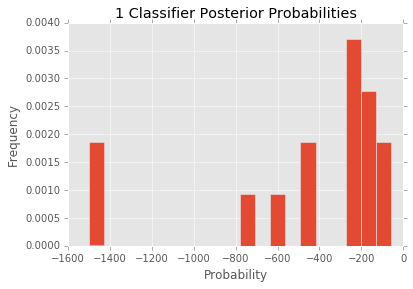

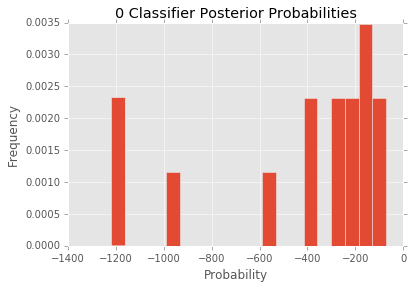

In [56]:
%matplotlib inline
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# Count up how many times you need to process a zero probabilty for each class and report.

print('Zero Probability Counts:')
print('------------------------')
for key, value in results.items():
    if key.startswith('zero_count_'):
        print('Classifier[{}] = {}'.format(
                key.rsplit('_', 1)[-1],
                value
        ))

# Note that I split my data into training/test/validation from the beginning, so my numbers might not match yours
# I did this because if you use the full data set for training and testing, it will falsely inflate your accuracy
# Providing counts from my 15% testing data

for classifier, posteriors in results['posteriors'].items(): 
    n, bins, patches = plt.hist(posteriors, 20, normed=1)

    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    plt.title('{} Classifier Posterior Probabilities'.format(classifier))
    plt.grid(True)
    plt.show()


# HW1.4:  Multinomial Naive Bayes with Smoothing 

## HW1.4.0: Repeat HW1.3 with the following modification: use Laplace plus-one smoothing. Compare the misclassifcation error rates for HW1.3 versus HW1.4 and explain the differences.

For a quick reference on the construction of the Multinomial NAIVE BAYES classifier that you will code,
please consult the "Document Classification" section of the following wikipedia page:

https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Document_classification

OR the original paper by the curators of the Enron email data:

http://www.aueb.gr/users/ion/docs/ceas2006_paper.pdf

In [57]:
build_model(    
    training_filename='enron_training_data.txt',
    smoothing_type='laplace',
    output_filename='enron_model_laplace.txt',
    min_word_frequency=1
)

In [58]:
run_classifier('laplace_test', 'enron_testing_data.txt', 'enron_model_laplace.txt')

{'accuracy': 0.9333333333333333,
 'email_count': 15,
 'error_rate': 0.06666666666666667,
 'posteriors': {u'0': [-160.4572591018953,
   -1674.8789379417065,
   -204.8614834634477,
   -245.51701157795486,
   -260.2100750488323,
   -303.2592994277852,
   -303.4298280557874,
   -665.9929754431943,
   -77.82666720085835,
   -1195.7261958586198,
   -156.2650744606221,
   -1593.296683784852,
   -197.40188404867317,
   -461.724677181589,
   -599.3477466955042],
  u'1': [-148.69043640362952,
   -1492.233044275802,
   -196.00111168543305,
   -245.6062862059797,
   -254.31376090427952,
   -294.15441855281404,
   -311.2489909158001,
   -625.7492542385748,
   -74.06339578067303,
   -1435.4700663313508,
   -1454.363977254987,
   -157.8468523971252,
   -190.8402276253004,
   -443.24864380175137,
   -648.7929891852878]},
 'trial_name': 'laplace_test',
 'zero_count_0': 453,
 'zero_count_1': 453}

<font color='green'> **Our error rate is much lower with the laplace smoothing as we are now dealing with the zero values** </font>

## HW 1.4.1 Jelinek-Mercer (JM) smoothing* 

HW 1.4.1 Jelinek-Mercer (JM) smoothing* 

With different smoothing methods, p(wk|ci) (i.e., the word class conditionals) will be computed
differently. We consider Jelinek-Mercer (JM) smoothing as an alternative to Laplace  Let c(w, ci) denote
the frequency of word w in category ci,  p(w|C) be the maximum likelihood estimation of word w in 
collection C (relative frequency) and let |C for classi| denote the length of the classi. Then:

1) Jelinek-Mercer (JM) smoothing:

λp(w|ci) = (1 − λ) * c(w, ci)/sum_over_wJ_in_V(c(wJ, ci))    +  λ p(w|C)

Where c(w, ci)/sum_over_wJ_in_V(c(wJ, ci)) essential denotes the relative frequency of word w in class ci, i.e., Pr(w|ci)
and one can set λ = 0.3  by default. 

In [59]:
build_model(    
    training_filename='enron_training_data.txt',
    smoothing_type='jm',
    output_filename='enron_model_jm.txt',
    min_word_frequency=1,
    jm_lambda=0.3
)

In [60]:
run_classifier('jm_test', 'enron_testing_data.txt', 'enron_model_jm.txt')

{'accuracy': 0.9333333333333333,
 'email_count': 15,
 'error_rate': 0.06666666666666667,
 'posteriors': {u'0': [-168.15090940706992,
   -1693.9314740680425,
   -211.84891343336764,
   -252.8081554182747,
   -265.9936175025167,
   -309.0166980743533,
   -313.48801623337505,
   -702.7226641777266,
   -79.81485296284743,
   -1235.8785066829491,
   -159.59269071302484,
   -1677.6249581953005,
   -201.47445764609134,
   -479.9919693760548,
   -617.5446954928036],
  u'1': [-1542.4219308794165,
   -156.30124896556958,
   -203.53000497148494,
   -254.7382238553255,
   -261.0106558089939,
   -299.18428750770084,
   -321.6832700588956,
   -650.9228087310825,
   -78.58776320477598,
   -1413.4871910105687,
   -1514.2166081005469,
   -162.62743716713473,
   -197.52407323244097,
   -457.8884218136707,
   -645.2135415754288]},
 'trial_name': 'jm_test',
 'zero_count_0': 453,
 'zero_count_1': 453}

## HW1.4.2 Split data in to training, validation and testing data subsets

Split the data using MRJob into three subsets in the following proportions (70% for training, 15% for valdiation, and 15% for testing). Train Multinomial Naive Bayes classifiers using Laplace plus-one smoothing and using  Jelinek-Mercer (JM) smoothing where you consider different hyperparameter values for λ. Please consider λ in {0.0, 0.1, 0.3, 0.5, 0.7, 1}. Present  a table compare the  results of the different approaches: each  row is the approach taken (e.g., Multinomial Naive Bayes with Laplace+1, or Multinomial Naive Bayes with  with JM= 0.3 for λ =0.3) and a column for  error rate on the training, validation and test data sets. Present a graph also (in python) consisting of three curves (where the x-axis represents the approach taken and the y-axis represents the error rate). Dont forget to put a good title on your graph!

Looking the validation curve select the best model. How does it perform on the unseen test set? Comment.


* REFERENCES 
   + http://www.ntu.edu.sg/home/gaocong/papers/wpp095-yuan.pdf

In [61]:
# I split the data the earlier steps so that I would not be using the same data for training and testing.
# If I hadn't done this, it would have hidden the difference in how well the different smoothing techniques worked 
# as every model would look good when using the same data for training and testing
# Not including error rate for training data as you don't calculate errors in training

import pandas as pd

testing_filename = 'enron_testing_data.txt'
validation_filename = 'enron_validation_data.txt'
model_filename = 'enron_model_trial.txt'
trials = []

def run_trial(trial_name, smoothing_type, jm_lambda=0.3, min_word_frequency=1):
    
    build_model(    
        training_filename='enron_training_data.txt',
        smoothing_type=smoothing_type,
        output_filename=model_filename,
        min_word_frequency=min_word_frequency,
        jm_lambda=jm_lambda
    )
    
    out = {'name': trial_name}
    
    results = run_classifier(trial_name, testing_filename, model_filename)
    out['error_test'] = results['error_rate']
    
    results = run_classifier(trial_name, validation_filename, model_filename)
    out['error_validate'] = results['error_rate']
    
    return out

trials.append(run_trial('unsmoothed', 'none'))
trials.append(run_trial('laplace', 'laplace'))
trials.append(run_trial('jm = 0.0', 'jm', jm_lambda=0.0))
trials.append(run_trial('jm = 0.1', 'jm', jm_lambda=0.1))
trials.append(run_trial('jm = 0.3', 'jm', jm_lambda=0.3))
trials.append(run_trial('jm = 0.5', 'jm', jm_lambda=0.5))
trials.append(run_trial('jm = 0.7', 'jm', jm_lambda=0.7))
trials.append(run_trial('jm = 1.0', 'jm', jm_lambda=1.0))

df = pd.DataFrame(trials)
print(df)

   error_test  error_validate        name
0    0.800000        1.000000  unsmoothed
1    0.066667        0.133333     laplace
2    0.800000        1.000000    jm = 0.0
3    0.066667        0.000000    jm = 0.1
4    0.066667        0.000000    jm = 0.3
5    0.066667        0.000000    jm = 0.5
6    0.066667        0.000000    jm = 0.7
7    0.600000        0.533333    jm = 1.0


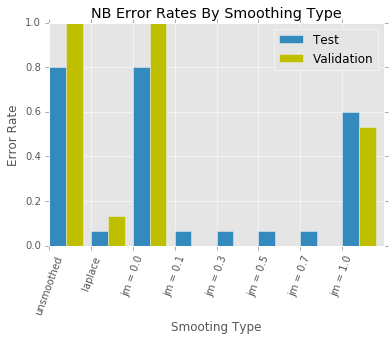

In [62]:
%matplotlib inline

import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')

indexes = 10 * df.index

fig = plt.figure()
ax = plt.subplot(111)

r1 = ax.bar(indexes, df.error_test, width=4)
r2 = ax.bar(indexes + 4, df.error_validate, width=4, color='y')
ax.legend((r1[0], r2[0]), ('Test', 'Validation'))

plt.xticks(indexes, df.name, rotation=70)
plt.ylabel('Error Rate')
plt.xlabel('Smooting Type')
plt.title('NB Error Rates By Smoothing Type')

<font color='green'> **The smoothed models perform much better on the test and validation data sets than the unsmoothed models. The best performers were JM methods with lambda set between .1 and .7, but all of the smoothing methods except JM lambda = 0.0 performed well. JM lambda 0.0 is essentailly resulting in an unsmoothed model. With a larger data set I believe we would see greater distinction between the smoothing methods and that the testing and validation data would perform more similarly** </font>

# HW1.5: Remove words with frequency of less than three (3) in the training set

Repeat HW1.4. This time when modeling and classification ignore tokens with a frequency of less than three (3) in the training set. How does it affect the misclassifcation error of learnt naive multinomial Bayesian Classifier on the training dataset. Report the error and the change in error. HINT: ignore tokens with a frequency of less than three (3). Think of this as a preprocessing step. How many new mapreduce jobs do you need to solve thus homework? 

In [64]:
import pandas as pd

trials = []

trials.append(run_trial('unsmoothed', 'none', min_word_frequency=3))
trials.append(run_trial('laplace', 'laplace', min_word_frequency=3))
trials.append(run_trial('jm = 0.0', 'jm', jm_lambda=0.0, min_word_frequency=3))
trials.append(run_trial('jm = 0.1', 'jm', jm_lambda=0.1, min_word_frequency=3))
trials.append(run_trial('jm = 0.3', 'jm', jm_lambda=0.3, min_word_frequency=3))
trials.append(run_trial('jm = 0.5', 'jm', jm_lambda=0.5, min_word_frequency=3))
trials.append(run_trial('jm = 0.7', 'jm', jm_lambda=0.7, min_word_frequency=3))
trials.append(run_trial('jm = 1.0', 'jm', jm_lambda=1.0, min_word_frequency=3))

df = pd.DataFrame(trials)
print(df)

   error_test  error_validate        name
0    0.733333        0.866667  unsmoothed
1    0.200000        0.133333     laplace
2    0.733333        0.866667    jm = 0.0
3    0.133333        0.133333    jm = 0.1
4    0.133333        0.133333    jm = 0.3
5    0.133333        0.133333    jm = 0.5
6    0.133333        0.133333    jm = 0.7
7    0.600000        0.533333    jm = 1.0


<font color='green'> **For the most part, removing words that occured less than 3 times improves our models. This is because words that occur so infrequently really don't provide us much information for classifying future data** </font>

# HW1.6 Benchmark your code with the Python SciKit-Learn implementation of the multinomial Naive Bayes algorithm

## HW1.6.0: Multinomial Naive Bayes using SciKit-Learn

It always a good idea to benchmark your solutions against publicly available libraries such as SciKit-Learn, The Machine Learning toolkit available in Python. In this exercise, we benchmark ourselves against the SciKit-Learn implementation of multinomial Naive Bayes.  For more information on this implementation see: http://scikit-learn.org/stable/modules/naive_bayes.html more  

In this exercise, please complete the following:

— Run the Multinomial Naive Bayes algorithm (using default settings) from SciKit-Learn over the same training data used in HW1.4.2 and report the misclassification error (please note some data preparation might be needed to get the Multinomial Naive Bayes algorithm from SkiKit-Learn to run over this dataset)
- Prepare a table to present your results, where rows correspond to approach used (SkiKit-Learn versus your Hadoop implementation) and the column presents the  misclassification error rates (train, validation, testing)
— Explain/justify any differences in terms of training error rates over the dataset in HW1.5 between your Multinomial Naive Bayes implementation (in Map Reduce) versus the Multinomial Naive Bayes implementation in SciKit-Learn 


In [65]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import *

import csv
import numpy as np

# read email message, and organize training data
with open('enronemail_1h.txt', 'r') as f:
    reader = csv.reader(f, delimiter="\t")
    emails = list(reader)
train_label = [msg[1] for msg in emails]
train_data = [msg[2] + msg[3] if len(msg) == 4 else msg[2] for msg in emails]
msg_id = [msg[0].lower() for msg in emails]
# print(train_label, train_data, msg_id)

# feature vectorization
uniVectorizer = CountVectorizer()
dtmTrain = uniVectorizer.fit_transform(train_data) 
# print(uniVectorizer, dtmTrain)

# multinomial Naive Bayes Classifier from sklearn
mnb = MultinomialNB()
mnb.fit(dtmTrain, train_label)
pred_mnb = mnb.predict(dtmTrain)
training_error_mnb = 1.0 * sum(pred_mnb != train_label) / len(train_label)

# Bernoulli Naive Bayes Classifier from sklearn
bnb = BernoulliNB()
bnb.fit(dtmTrain, train_label)
pred_bnb = bnb.predict(dtmTrain)
training_error_bnb = 1.0*sum(pred_bnb != train_label) / len(train_label)

print 'SK- multinomial NB training error: %.4f' %training_error_mnb
print 'SK- Bernoulli   NB training error: %.4f' %training_error_bnb

SK- multinomial NB training error: 0.0000
SK- Bernoulli   NB training error: 0.1600


<font color='green'> **Unfortunately, I was unable to complete the very last part of this assignment with the time allowed.** </font>